<a href="https://colab.research.google.com/github/ZahraDehghani99/Digital-Image-Processing/blob/main/examples/2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

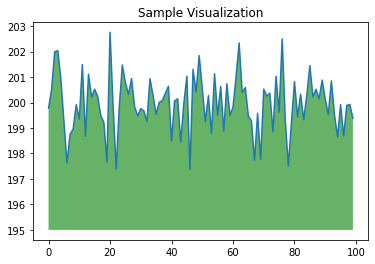

In [2]:
import numpy as np
import matplotlib.pyplot as plt

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Sample Visualization")
plt.show()

In [3]:
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt    # to draw histogram

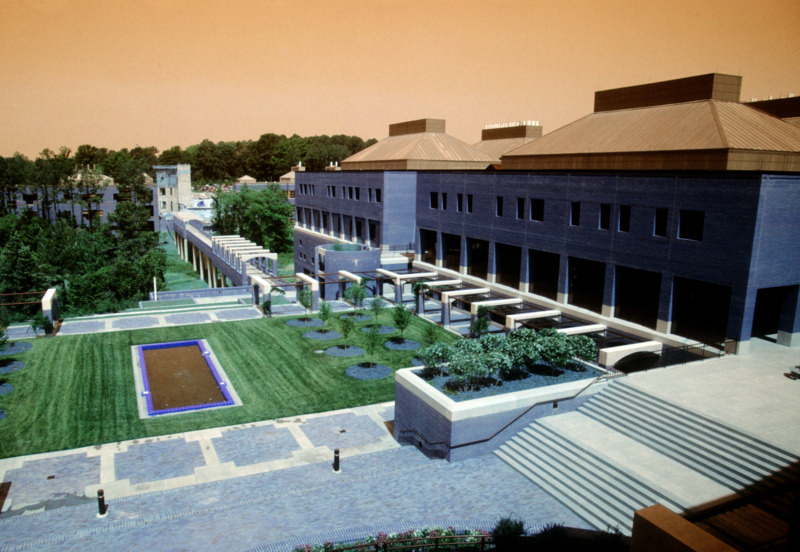

In [4]:
# Create a list to store the urls of the images
url = "https://iiif.lib.ncsu.edu/iiif/0052574/full/800,/0/default.jpg"
# Read and display the image

image = io.imread(url) 
image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
cv2_imshow(image)  

In [5]:
# Check the image matrix data type (could know the bit depth of the image)
print(image.dtype)
# Check the height of image 
print(image.shape[0])
# Check the width of image 
print(image.shape[1])
# Check the number of channels of the image
print(image.shape[2])
print(image.shape)

uint8
552
800
3
(552, 800, 3)


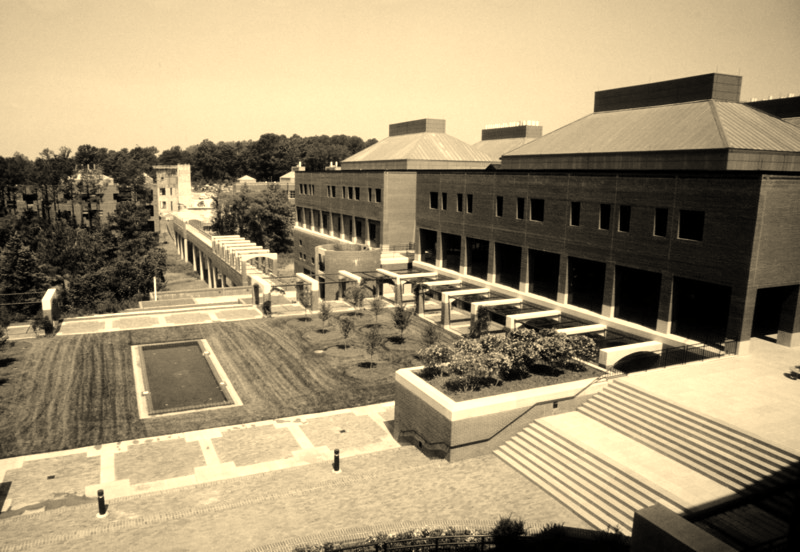

In [6]:
(b,g,r)=cv.split(image)
r_new = r*0.393 + g*0.769 + b*0.189
g_new = r*0.349 + g*0.686 + b*0.168
b_new = r*0.272 + g*0.534 + b*0.131
img_new=cv.merge([b_new, g_new, r_new])
cv2_imshow(img_new)

In [11]:
image.ravel()

array([ 86, 152, 210, ...,   0,   0,   0], dtype=uint8)

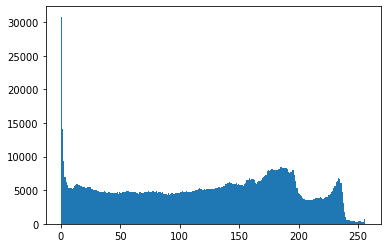

In [12]:
plt.hist(image.ravel(),bins = 256, range = [0,256]) 
plt.show()

#Original array : 
# [[ 0  1  2  3  4]
# [ 5  6  7  8  9]
# [10 11 12 13 14]]

#numpy.ravel() :  [ 0  1  2 ..., 12 13 14]

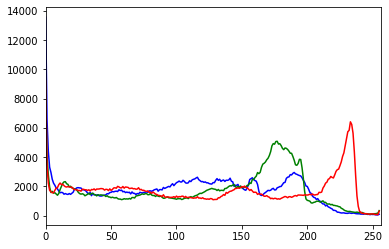

In [13]:
color = ('b','g','r')

#enumerate is useful for obtaining an indexed list:
#    (0, seq[0]), (1, seq[1]), (2, seq[2]), ...


for i,col in enumerate(color):
    histr = cv.calcHist([image],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

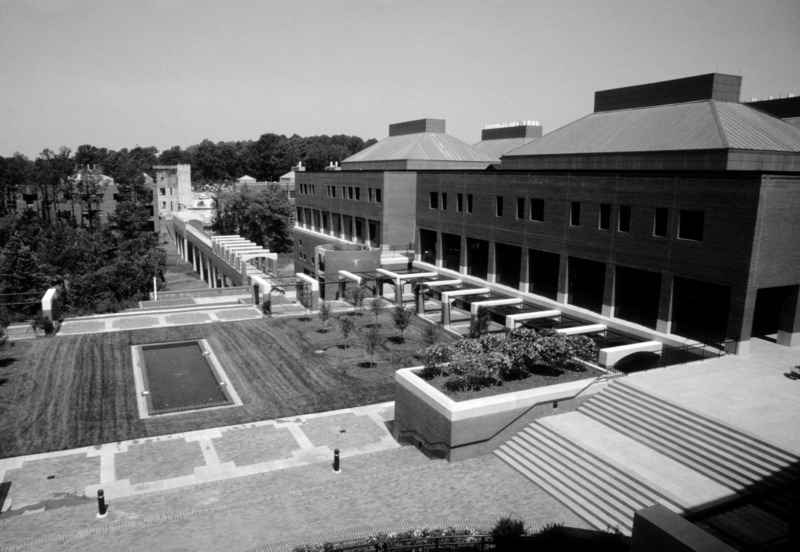

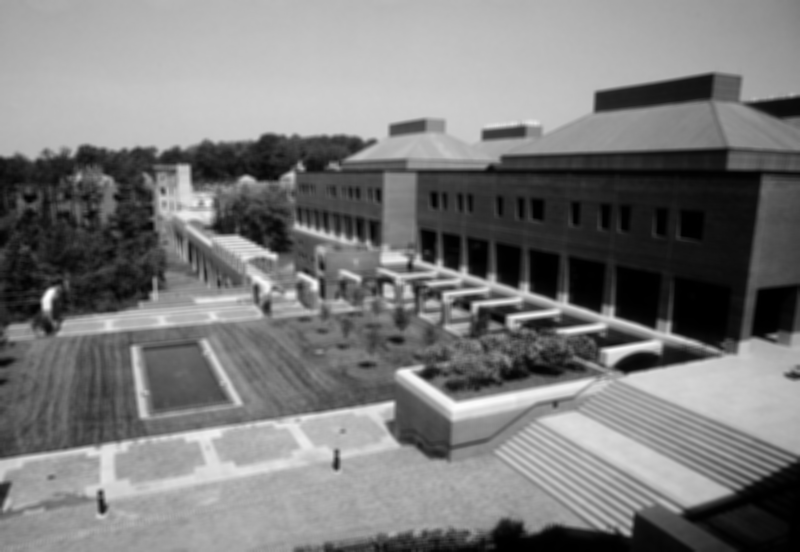

In [15]:
# Blur the grayscale image 

gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
imBlur = cv.blur(gray_image,(5,5)) # (5,5) => bluring kernel size

cv2_imshow(gray_image)
cv2_imshow(imBlur)

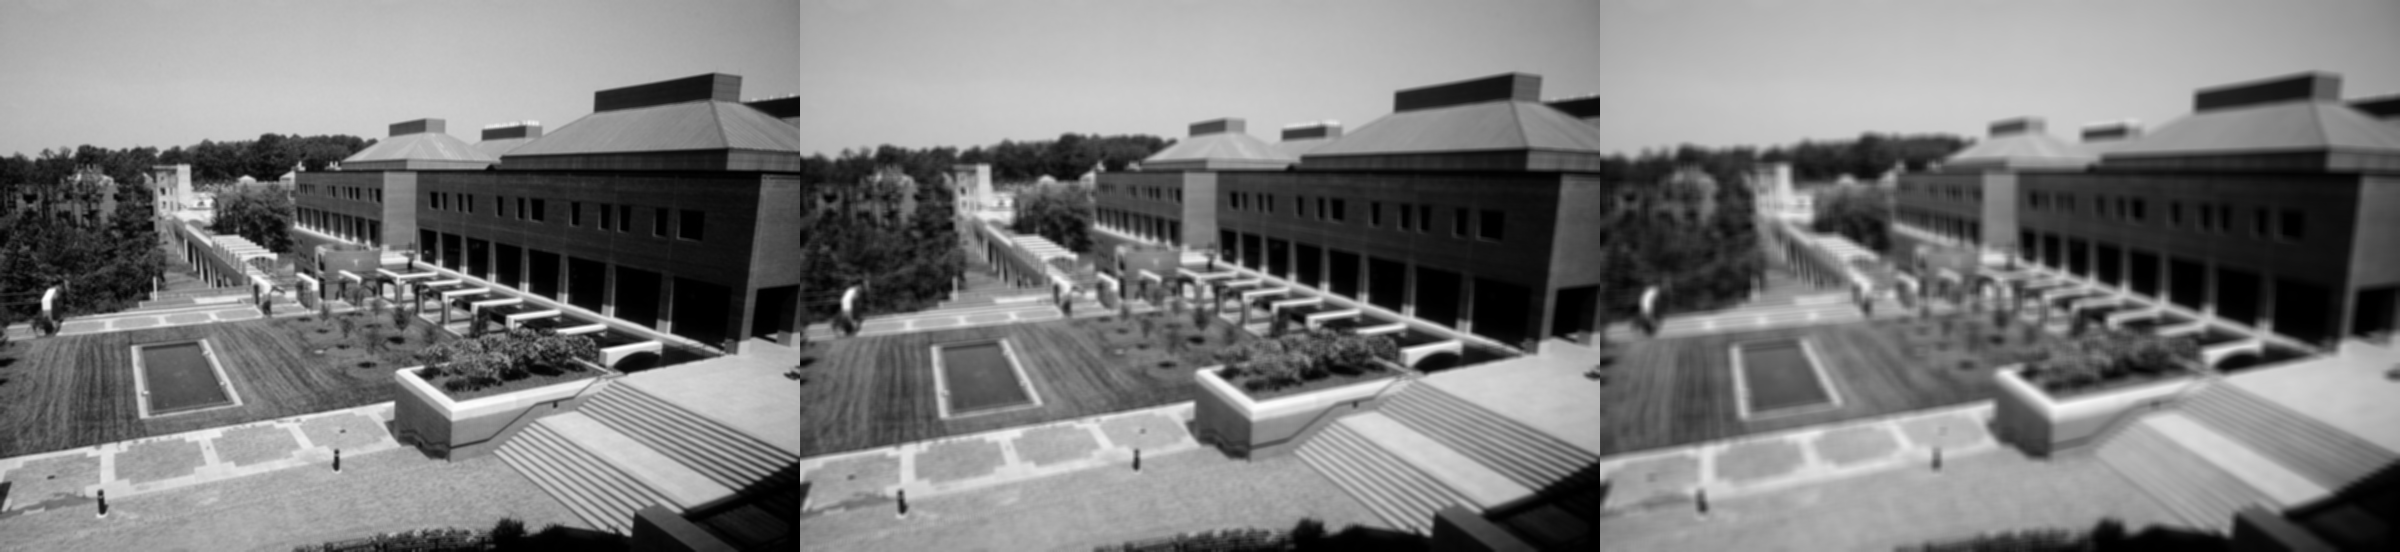

In [16]:
# np.hstack => Stack arrays in sequence horizontally (column wise).This is equivalent to concatenation along the second axis
blurred_1 = np.hstack([
  cv.blur(gray_image,(3,3)),
  cv.blur(gray_image,(5,5)),
  cv.blur(gray_image,(9,9))])  
cv2_imshow(blurred_1)

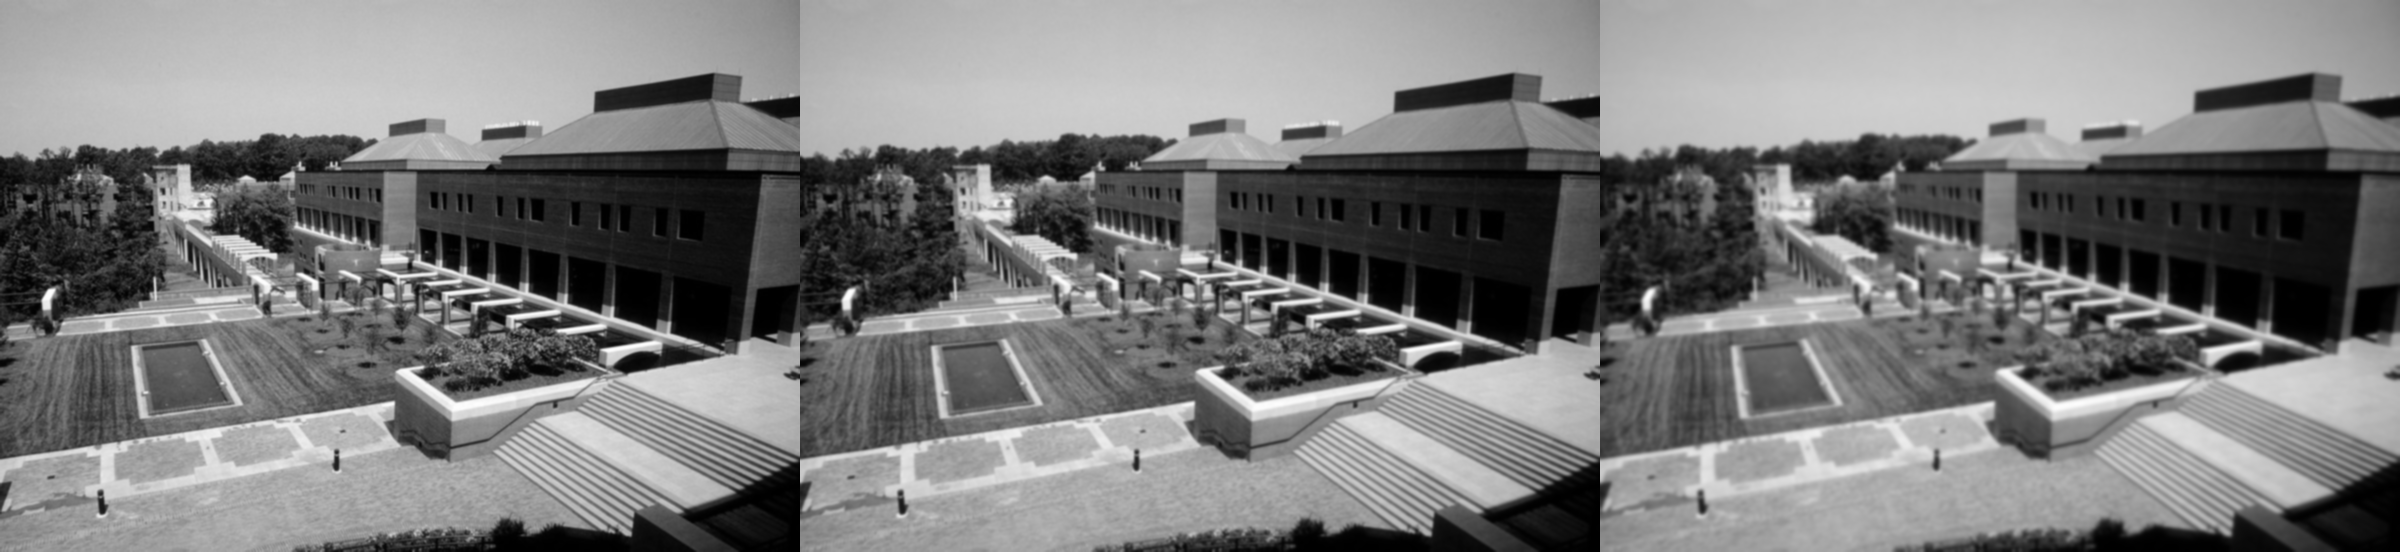

In [17]:
Gaussian_blurred_1 = np.hstack([
  cv.GaussianBlur(gray_image,(3,3),0),
  cv.GaussianBlur(gray_image,(5,5),0),
  cv.GaussianBlur(gray_image,(9,9),0)])  
cv2_imshow(Gaussian_blurred_1)

filer2D :https://www.askpython.com/python-modules/opencv-filter2d

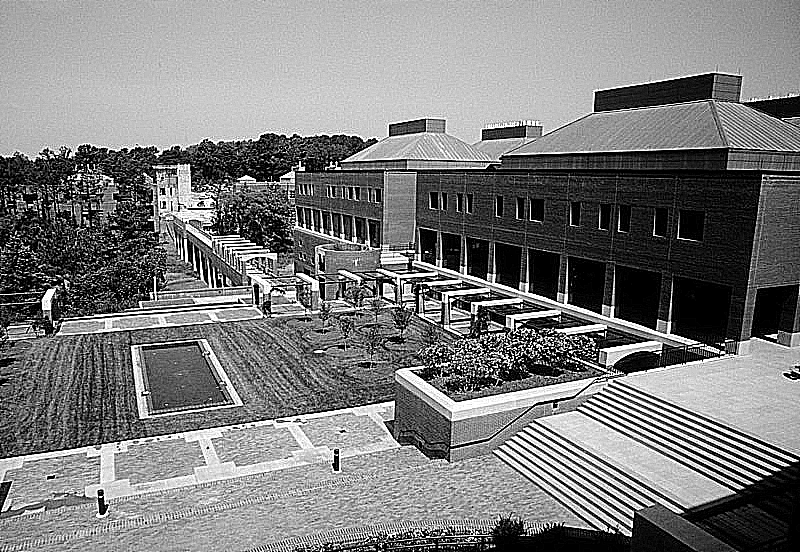

In [20]:
filter = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
# Applying cv2.filter2D function on our  image
sharpen_img_1=cv.filter2D(gray_image,-1,filter)
cv2_imshow(sharpen_img_1)

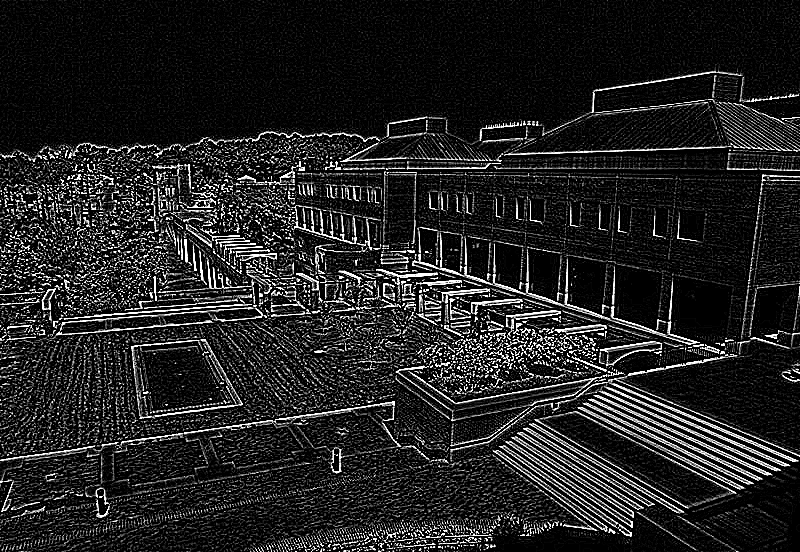

In [21]:
filter = np.array([[0,0,-1,0,0],[0,-1,-2,-1,0],[-1,-2,16,-2,-1],[0,-1,-2,-1,0],[0,0,-1,0,0]])
# Applying cv2.filter2D function on our image
mexican_hat_img1=cv.filter2D(gray_image,-1,filter)
cv2_imshow(mexican_hat_img1)